# Chapter 8. Gradient descent

Optimization problem

## 8.1 The idea behind gradient descent

In [1]:
from typing import List

Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [2]:
def sum_of_squares(v: Vector) -> float:
    '''Computes the sum of squared elements in v'''
    return dot(v, v)

We’ll frequently need to maximize or minimize such functions. That is, we need to find the input v that produces the largest (or smallest) possible value

Accordingly, one approach to maximizing a function is to pick a random starting point, compute the gradient, take a small step in the direction of the gradient (i.e., the direction that causes the function to increase the most), and repeat with the new starting point. Similarly, you can try to minimize a function by taking small steps in the opposite direction

If a function has a unique global minimum, this procedure is likely to find it. If a function has multiple (local) minima, this procedure might “find” the wrong one of them, in which case you might rerun the procedure from different starting points. If a function has no minimum, then it’s possible the procedure might go on forever

## 8.2 Estimating the gradient

If f is a function of one variable, its derivative at a point x measures how f(x) changes when we make a very small change to x. The derivative is defined as the limit of the difference quotients: as h approaches zero

In [3]:
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

In [4]:
def square(x: float) -> float:
    return x * x

In [5]:
def derivative(x: float) -> float:
    return 2 * x

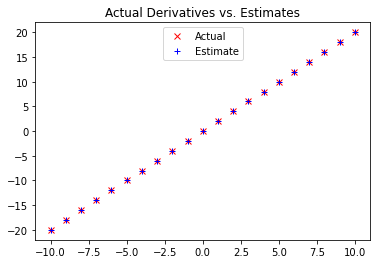

In [8]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h = 0.001) for x in xs]

import matplotlib.pyplot as plt 
plt.title('Actual Derivatives vs. Estimates')
plt.plot(xs, actuals, 'rx', label = 'Actual')
plt.plot(xs, estimates, 'b+', label = 'Estimate')
plt.legend(loc = 9)
plt.show()

When f is a function of many variables, it has multiple partial derivatives, each indicating how f changes when we make small changes in just one of the input variables.

We calculate its ith partial derivative by treating it as a function of just its ith variable, holding the other variables fixed

In [9]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    '''Returns the i-th partial difference quotient of f at v'''
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [10]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

A major drawback to this “estimate using difference quotients” approach is that it’s computationally expensive. If v has length n, estimate_gradient has to evaluate f on 2n different inputs. If you’re repeatedly estimating gradients, you’re doing a whole lot of extra work. In everything we do, we’ll use math to calculate our gradient functions explicitly

## 8.3 Using the gradient

In [16]:
import random 
import math

def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

In [17]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    '''Moves step_size in the gradient direction from v'''
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)
    v = gradient_step(v, grad, -0.01)
    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001

0 [1.563827001281425, -9.743459881066311, -5.107814255678656]
1 [1.5325504612557965, -9.548590683444985, -5.005657970565083]
2 [1.5018994520306805, -9.357618869776084, -4.905544811153781]
3 [1.4718614629900668, -9.170466492380562, -4.807433914930706]
4 [1.4424242337302655, -8.98705716253295, -4.711285236632092]
5 [1.4135757490556602, -8.807316019282291, -4.61705953189945]
6 [1.385304234074547, -8.631169698896645, -4.524718341261461]
7 [1.357598149393056, -8.458546304918713, -4.4342239744362315]
8 [1.3304461864051949, -8.289375378820338, -4.345539494947507]
9 [1.3038372626770909, -8.123587871243931, -4.258628705048556]
10 [1.2777605174235491, -7.9611161138190525, -4.173456130947585]
11 [1.252205307075078, -7.801893791542671, -4.089987008328634]
12 [1.2271612009335764, -7.6458559157118176, -4.008187268162061]
13 [1.2026179769149048, -7.492938797397581, -3.92802352279882]
14 [1.1785656173766066, -7.34308002144963, -3.8494630523428435]
15 [1.1549943050290745, -7.196218421020638, -3.7724737

## 8.4 Choosing the right step size

1. Using a fixed step size
2. Gradually shrinking the step size over time
3. At each step, choosing the step size that minimizes the value of the objective function

## 8.5 Using gradient descent to fit models

Use gradient descent to find the model parameters that make the loss as small as possible

In [19]:
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In this case we know the parameters of the linear relationship between x and y, but imagine we’d like to learn them from the data. We’ll use gradient descent to find the slope and intercept that minimize the average squared error

In [20]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

Now, that computation was for a single data point. For the whole dataset we’ll look at the mean squared error. And the gradient of the mean squared error is just the mean of the individual gradients
1. Start with a random value for theta
2. Compute the mean of the gradients
3. Adjust theta in that direction
4. Repeat

In [21]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [23]:
# Start with random values for slope and intercept 

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients 
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction 
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [32.91625344445118, 0.19013536422155722]
1 [11.380049087915282, 0.2126713469375656]
2 [25.744719929707447, 0.21362605333160575]
3 [16.163485432938465, 0.22894352115464994]
4 [22.554184159751202, 0.23464911954527912]
5 [18.29159381456549, 0.24673400546593977]
6 [21.134753659690283, 0.2545321312695734]
7 [19.238373841117852, 0.26515782066672455]
8 [20.503269805795057, 0.273865878866509]
9 [19.659592905413565, 0.28382141691457097]
10 [20.222335353506068, 0.29291336698615544]
11 [19.84699523257844, 0.30254987560568924]
12 [20.097356729745787, 0.3117917710870563]
13 [19.930374853030646, 0.32126554427462795]
14 [20.041761238572832, 0.33055338803910933]
15 [19.96747580725996, 0.339934042501604]
16 [20.01703357060011, 0.34922165022386076]
17 [19.983987830059952, 0.3585402404940132]
18 [20.006038657590505, 0.3678071478430851]
19 [19.991340022534978, 0.3770775722049894]
20 [20.001153282541374, 0.3863147570831144]
21 [19.99461707530199, 0.39554328085148954]
22 [19.998985954054426, 0.40474681136

## 8.6 Minibatch and stochastic gradient descent

One drawback of the preceding approach is that we had to evaluate the gradients on the entire dataset before we could take a gradient step and update our parameters. In this case it was fine, because our dataset was only 100 pairs and the gradient computation was cheap. Your models, however, will frequently have large datasets and expensive gradient computations. In that case you’ll want to take gradient steps more often. We can do this using a technique called minibatch gradient descent, in which we compute the gradient (and take a gradient step) based on a “minibatch” sampled from the larger dataset

In [24]:
from typing import TypeVar, List, Iterator

T = TypeVar('T') # This allows us to type generic functions 

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    '''Generates batch_size sized minibatches from the dataset'''
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    
    if shuffle: random.shuffle(batch_starts)
    
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [25]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size = 20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)
slope, intercept = theta

assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [16.693498106545768, 1.1285149838425048]
0 [19.533764438246298, 1.0006913762431964]
0 [20.77031086491164, 0.97092491298866]
0 [18.633627070312144, 0.9181285048346632]
0 [18.721092185106066, 0.9249258748953061]
1 [22.67151563742258, 0.8294844901391069]
1 [14.486866026235832, 0.6267757858024449]
1 [14.851872778263834, 0.6300091002570758]
1 [19.279803635729618, 0.8395260437042721]
1 [19.76244230591473, 0.8183189406817779]
2 [20.849891480650626, 0.8454493606331508]
2 [20.309058701087867, 0.8206126941665101]
2 [19.857387579662, 0.8416428755227796]
2 [19.997884423450632, 0.838407983724356]
2 [19.993864575063164, 0.8467290521803579]
3 [19.99012237758611, 0.8550294586510603]
3 [20.159945022435007, 0.8637046270078998]
3 [19.289569107132678, 0.8849327645711196]
3 [19.765212170310754, 0.8640352324344172]
3 [20.840222200168064, 0.8908554005149988]
4 [19.909665736036747, 0.9335227999208594]
4 [19.882629864315344, 0.9343386789399941]
4 [20.577875731106083, 0.951742242301202]
4 [20.257854554031606,

Another variation is stochastic gradient descent, in which you take gradient steps based on one training example at a time:

In [26]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.085192695185462, 0.7597878121980849]
1 [20.081536932390996, 0.9417088836651416]
2 [20.078038696754007, 1.1158248434672944]
3 [20.074690542882795, 1.282470573523073]
4 [20.07148603961954, 1.4419665747150443]
5 [20.068419030817058, 1.594619597567517]
6 [20.065483583434975, 1.7407232312379215]
7 [20.06267408962082, 1.8805584689455035]
8 [20.05998514389303, 2.0143942489052273]
9 [20.057411540720743, 2.142487970148483]
10 [20.054948367421115, 2.2650859884258083]
11 [20.052590871965233, 2.3824240903055105]
12 [20.050334543262988, 2.49472794638739]
13 [20.048174989210874, 2.602213544521112]
14 [20.046108111871927, 2.7050876060304616]
15 [20.044129894969437, 2.803547983294647]
16 [20.042236543429027, 2.897784039505778]
17 [20.04042444680785, 2.9879770142735183]
18 [20.038690097394916, 3.0743003714861143]
19 [20.037030145975883, 3.156920132037077]
20 [20.035441428241466, 3.2359951942571685]
21 [20.033920834726192, 3.3116776385410676]
22 [20.032465517229515, 3.3841130210251786]
23 [20.0310

## 8.7 For further exploration